# Are Americans Happy?

#### 8 May 2019
#### Daphka Alius

It's not uncommon to have come across an article that rates the happiness of different nations. The United Nations provide an annual report that ranks the happiness level of each country. The recent report shows that Scandinavian countries like Finland, Norway, Denmark and Iceland reigned the top ranks, in that respective order with the US ranked in the 18th position. Although Americans are ranked in the top 20% of the 156 countries represented in the 2018 report, which makes this country relatively happy compared to other nations around the world, it would be interesting to see what factors contribute most to Americans's happiness level. There are a few things that contribute to happiness and we cannot control for all. For example, genetics can play a huge role in a person's happiness - some even say 50% - and circumstances and voluntary activities compose the other 50%.

Since it would be impossible to control a lot of factors, however, it would be an interesting to see the relationship between some of these factors and a person's happiness. Specifically, does religion, income, education, and health play a role in how happy or unhappy are Americans?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style("white")

## Loading and Validating Data

In [3]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss #df

In order to answer this question, I will be using the General Social Survey Data (GSS) from the year 1972-2016.

In [4]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


In [5]:
gss.tail()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
62461,2016,2863,0,2,3,2,57,20,16,16,...,0,56160.0,1959,0,2,0.956994,2,1,0,0.804382
62462,2016,2864,0,1,1,4,77,15,15,12,...,0,17550.0,1939,0,1,0.478497,1,1,0,0.402191
62463,2016,2865,0,2,1,4,87,14,8,8,...,0,25740.0,1929,0,2,0.956994,2,1,0,0.804382
62464,2016,2866,0,2,7,2,55,14,12,11,...,0,12870.0,1961,0,1,0.956994,2,1,0,0.804382
62465,2016,2867,0,1,2,2,72,16,97,12,...,0,38610.0,1944,0,3,0.956994,2,0,0,0.804382


The columns of interest are:
+ **happy:** respondents' answer to question related to general happiness
+ **educ:** respondents' highest year of education completed
+ **realinc** respondents' total family income
+ **relig** respondents' religious preference

In [6]:
gss = gss[['happy', 'realinc', 'educ', 'health', 'relig']]

In [7]:
happiness = gss.happy
income = gss.realinc
education = gss.educ
health= gss.health
religion = gss.relig

## Data Cleaning

The code for the happy happiness are as followed:
+ **1:** Very happy
+ **2:** Pretty happy
+ **3:** Not too happy

To get a real measurement of happiness, we have to clean the data by replacing the invalid answers 0, 8, 9 with NAN values.

In [8]:
happiness.replace([0, 8, 9], np.nan, inplace=True)

We have to do the same with the variable education.

The code for the variable educ is as followed:
+ **0-20:** Number of years of schooling




In [9]:
education.replace([98, 99], np.nan, inplace=True)

... and the variable income.

The code for the variable realinc is as followed:
+ **234-162607:** respondents' income



In [10]:
income.replace(0, np.nan, inplace=True)

... and the variable health.

In [11]:
health.replace([8,9,0], np.nan, inplace=True)

The code for the variable health is as followed:
+ **1:** Excellent Health
+ **2:** Good Health
+ **3:** Fair Health
+ **4:** Poor Health

... and the variable religion.

In [12]:
religion.replace([98, 99], np.nan, inplace=True)

In [13]:
y = (religion.value_counts()/len(religion)).sort_index()
y

1.0     0.575801
2.0     0.243028
3.0     0.019947
4.0     0.116127
5.0     0.017113
6.0     0.002834
7.0     0.001425
8.0     0.000608
9.0     0.002177
10.0    0.001793
11.0    0.012199
12.0    0.000480
13.0    0.002161
Name: relig, dtype: float64

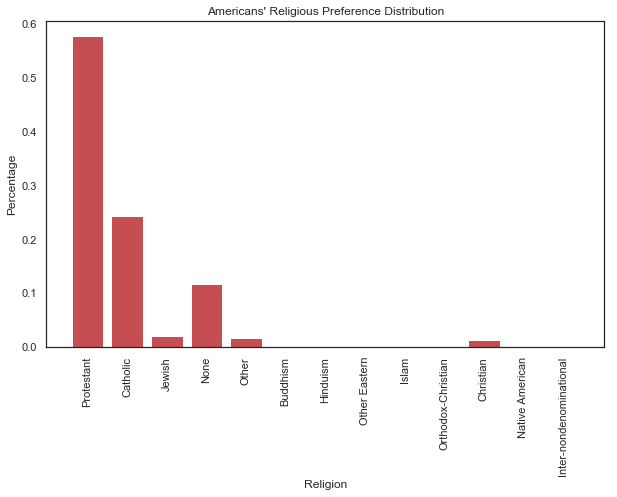

In [14]:
plt.bar(['Protestant', 'Catholic', 'Jewish', 'None', 'Other', 'Buddhism', 'Hinduism', 'Other Eastern',
         'Islam', 'Orthodox-Christian', 'Christian', 'Native American', 'Inter-nondenominational'], y, color='r')
plt.ylabel('Percentage')
plt.title("Americans' Religious Preference Distribution")
plt.xlabel('Religion')
plt.xticks(rotation='vertical')
plt.savefig("religion.png", bbox_inches="tight", ext="png")
plt.show()

The code for the variable religion are recoded as followed:
+ **1:** Has a religious preference
+ **0:** Does not have a religious preference

In [15]:
religion.replace([1,2,3,4,6,7,8,9,10,11,12,13], 1, inplace=True)
religion.replace([5], 0, inplace=True)

In [16]:
religion.describe()

count    62197.000000
mean         0.982813
std          0.129970
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: relig, dtype: float64

In [17]:
gss.describe()

,happy,realinc,educ,health,relig
count,57710.000000,56141.000000,62292.000000,46021.000000,62197.000000
mean,1.813031,31636.199666,12.837234,2.004715,0.982813
std,0.637273,29402.370825,3.179130,0.848676,0.129970
min,1.000000,234.000000,0.000000,1.000000,0.000000
25%,1.000000,12080.625000,12.000000,1.000000,1.000000
50%,2.000000,24097.500000,12.000000,2.000000,1.000000
75%,2.000000,39022.500000,15.000000,2.000000,1.000000
max,3.000000,162607.000000,20.000000,4.000000,1.000000


In [18]:
y = (happiness.value_counts()/len(happiness)).sort_index()
y

1.0    0.290110
2.0    0.516377
3.0    0.117376
Name: happy, dtype: float64

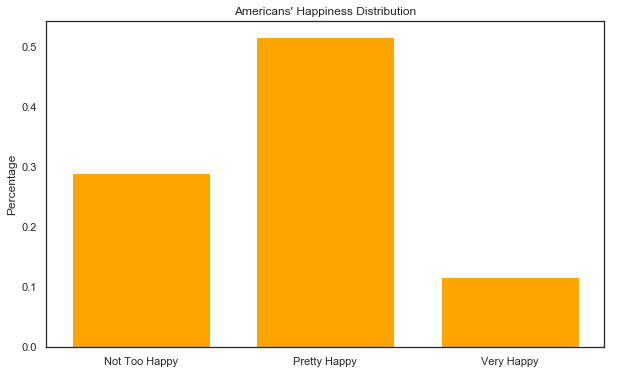

In [19]:
plt.bar(['Not Too Happy', 'Pretty Happy', "Very Happy"], y, width=0.75, color="orange")
plt.ylabel('Percentage')
plt.title("Americans' Happiness Distribution")
plt.savefig("happy.png", bbox_inches="tight", ext="png")
plt.show()



It appears that based on those surveys, about 63% would consider themselves at least pretty happy. The US ranked 19 in the 2016-2018 World Happinesss ranking with a score of 6.892 out of 10. This was well below my expectations but the US ranked in the top 20 relative to 156 other countries.

In order to perform a logistic regression, I recode the variables to be binary. Thus I will combine pretty happy to indicate **happy** and not too happy to indicate **not happy**.

In [20]:
happiness.replace(1, 0, inplace=True)
happiness.replace([2, 3], 1, inplace=True)

In [21]:
y = (happiness.value_counts()/len(happiness)).sort_index()
y

0.0    0.290110
1.0    0.633753
Name: happy, dtype: float64

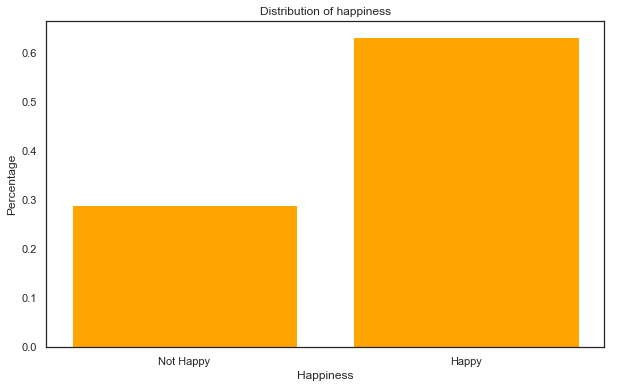

In [22]:
plt.bar(['Not Happy', 'Happy'], y, color='orange')
plt.title('Distribution of happiness')
plt.ylabel('Percentage')
plt.xlabel('Happiness')
plt.show()

In [23]:
y = (religion.value_counts()/len(religion)).sort_index()
y

0.0    0.017113
1.0    0.978580
Name: relig, dtype: float64

Text(0.5, 0, 'Religion')

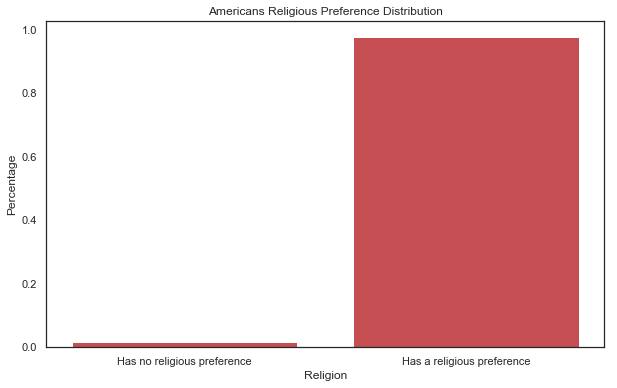

In [24]:
plt.bar(['Has no religious preference', "Has a religious preference"], y, color = 'r')
plt.title('Americans Religious Preference Distribution')
plt.ylabel('Percentage')
plt.xlabel('Religion')

Out of the 62,197 respondents who provided valid reasons, we have 97% of them claiming to have a religious preference or identified with a religion.

A breakdown of those religion are provided above.

In [25]:
y = (education.value_counts()/len(education)).sort_index()
x = y.index
y

0.0     0.002577
1.0     0.000720
2.0     0.002369
3.0     0.003954
4.0     0.005027
5.0     0.006387
6.0     0.012935
7.0     0.013944
8.0     0.043047
9.0     0.032530
10.0    0.045065
11.0    0.058400
12.0    0.304262
13.0    0.082877
14.0    0.109612
15.0    0.044552
16.0    0.126869
17.0    0.029936
18.0    0.036260
19.0    0.014008
20.0    0.021884
Name: educ, dtype: float64

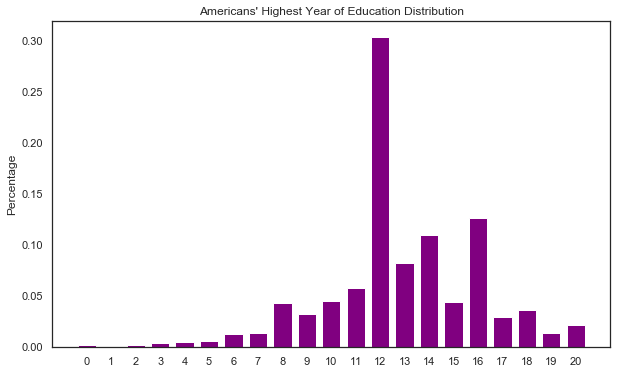

In [26]:
plt.bar(x, y, width=0.75, color="purple")
plt.ylabel('Percentage')
plt.title("Americans' Highest Year of Education Distribution")
plt.xticks(np.arange(0, 21, step=1))
plt.savefig("education.png", bbox_inches="tight", ext="png")
plt.show()

In [27]:
y = (health.value_counts()/len(health)).sort_index()
y

1.0    0.221352
2.0    0.332789
3.0    0.140364
4.0    0.042231
Name: health, dtype: float64

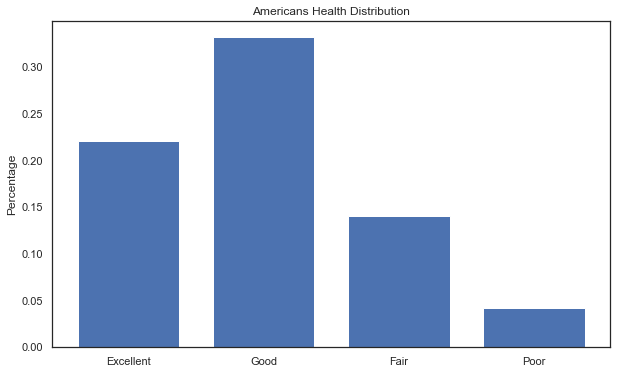

In [28]:
plt.bar(['Excellent', 'Good', 'Fair', 'Poor'], y, width=0.75)
plt.ylabel('Percentage')
plt.title("Americans Health Distribution")
plt.show()

/Users/daphka/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daphka/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


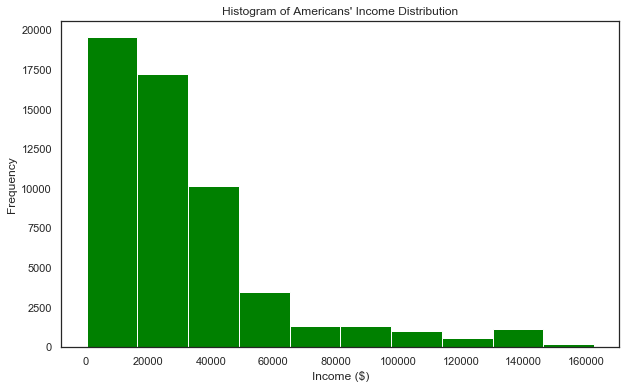

In [29]:
plt.hist(income, color = 'green')
plt.ylabel('Frequency')
plt.xlabel('Income ($)')
plt.title("Histogram of Americans' Income Distribution")
plt.savefig("income.png", bbox_inches="tight", ext="png")
plt.show()

In [30]:
income.describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

## Logistic regression

In order to perform logistic regression, we need to first import statsmodels formula API which provides a **logit** function that we can use to compute a logistic regression.

In [31]:
import statsmodels.formula.api as smf

In [32]:
model=smf.logit('happy ~ realinc + educ + C(health) +C(relig)', data=gss)

We will use logistic regression to see what factors are associated with happiness.

In [33]:
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.593339
         Iterations 5


Here's a summary of the results.

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  happy   No. Observations:                38611
Model:                          Logit   Df Residuals:                    38604
Method:                           MLE   Df Model:                            6
Date:                Tue, 07 May 2019   Pseudo R-squ.:                 0.04800
Time:                        01:19:28   Log-Likelihood:                -22909.
converged:                       True   LL-Null:                       -24064.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2615      0.104      2.516      0.012       0.058       0.465
C(health)[T.2.0]     0.7312      0.025     28.872      0.000       0.682       0.781
C(health)[T.3.0]     1.1783      0.036     32.696      0.000       1.108       1.249
C(health)[T.4.0]     1.3249      0.062     21.312      0.000       1.203       1.447
C(relig)[T.1.0]     -0.1893      0.088     -2.145      0.032      -0.362      -0.016
realinc            -8.7e-06   4.12e-07    -21.118      0.000   -9.51e-06   -7.89e-06
educ                 0.0309      0.004      7.786      0.000       0.023       0.039
====================================================================================
"""

The parameters of the results are:

In [35]:
results.params

Intercept           0.261476
C(health)[T.2.0]    0.731153
C(health)[T.3.0]    1.178341
C(health)[T.4.0]    1.324923
C(relig)[T.1.0]    -0.189275
realinc            -0.000009
educ                0.030858
dtype: float64

Based on these parameters, it's really hard to interpret the results, but there appears to be a positive correlation between happiness and health.

If we go back to our original data, let's see the breakdown of happiness for each category.

In [36]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


In [37]:
gss = gss[['happy', 'realinc', 'educ', 'health', 'relig']]

In [38]:
happiness.replace([0, 8, 9], np.nan, inplace=True)
education.replace([98, 99], np.nan, inplace=True)
income.replace(0, np.nan, inplace=True)
health.replace([8,9,0], np.nan, inplace=True)
religion.replace([98, 99], np.nan, inplace=True)

In [39]:
excellentHealth = gss[gss['health'] == 1]

In [40]:
excellentHappy = len(excellentHealth[gss['happy'] == 1])/len(excellentHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [41]:
excellentHappy

0.4309683951688725

In [42]:
excellentPrettyHappy = len(excellentHealth[gss['happy'] == 2])/len(excellentHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [43]:
excellentPrettyHappy

0.43718811021913645

In [44]:
excellentNotHappy = len(excellentHealth[gss['happy'] == 3])/len(excellentHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [45]:
excellentNotHappy

0.06422217400737687

In [46]:
goodHealth = gss[gss['health']==2]

In [47]:
goodHappy = len(goodHealth[gss['happy'] == 1])/len(goodHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [48]:
goodHappy

0.26760631133346163

In [49]:
goodPrettyHappy = len(goodHealth[gss['happy'] == 2])/len(goodHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [50]:
goodPrettyHappy

0.5649413122955551

In [51]:
goodNotHappy = len(goodHealth[gss['happy'] == 3])/len(goodHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [52]:
goodNotHappy

0.09813353857994997

In [53]:
fairHealth = gss[gss['health'] == 3]

In [54]:
fairHappy = len(fairHealth[gss['happy']==1])/len(fairHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [55]:
fairHappy

0.18829835766423358

In [56]:
fairPrettyHappy = len(fairHealth[gss['happy']==2])/len(fairHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [57]:
fairPrettyHappy

0.542655109489051

In [58]:
fairNotHappy = len(fairHealth[gss['happy']==3])/len(fairHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [59]:
fairNotHappy

0.20358120437956204

In [60]:
poorHealth = gss[gss['health'] == 4]

In [61]:
poorHappy = len(poorHealth[gss['happy'] == 1])/len(poorHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [62]:
poorHappy

0.1607278241091736

In [63]:
poorPrettyHappy = len(poorHealth[gss['happy'] == 2])/len(poorHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [64]:
poorPrettyHappy

0.432524639878696

In [65]:
poorNotHappy = len(poorHealth[gss['happy'] == 3])/len(poorHealth)

/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [66]:
poorNotHappy

0.3411675511751327

In [67]:
y1 = [excellentHappy, excellentPrettyHappy, excellentNotHappy]
y2 = [goodHappy, goodPrettyHappy, goodNotHappy]
y3 = [fairHappy, fairPrettyHappy, fairNotHappy]
y4 = [poorHappy, poorPrettyHappy, poorNotHappy]

In [68]:
y1

[0.4309683951688725, 0.43718811021913645, 0.06422217400737687]

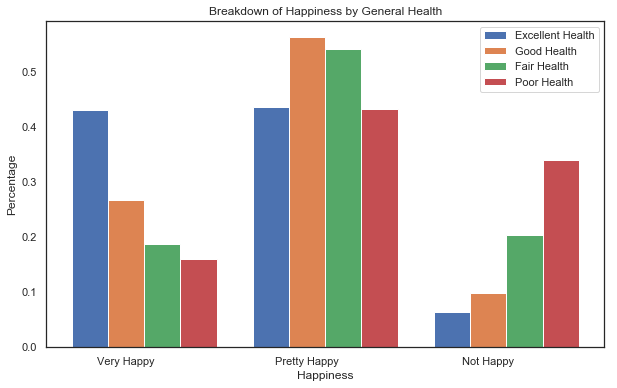

In [69]:
N=3
ind = np.arange(N)
width = 0.2
plt.bar(ind, y1, width, label='Excellent Health')
plt.bar(ind + width, y2, width, label='Good Health')
plt.bar(ind + 2*width, y3, width, label = 'Fair Health')
plt.bar(ind + 3*width, y4, width, label= 'Poor Health')
plt.xticks(ind + width, ('Very Happy', 'Pretty Happy', 'Not Happy'))
plt.legend()
plt.xlabel('Happiness')
plt.ylabel('Percentage')
plt.title('Breakdown of Happiness by General Health')
plt.savefig("breakdown.png", bbox_inches="tight", ext="png")
plt.show()

In [70]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


In [71]:
gss = gss[['happy', 'realinc', 'educ', 'health', 'relig']]

In [72]:
happiness.replace([0, 8, 9], np.nan, inplace=True)
education.replace([98, 99], np.nan, inplace=True)
income.replace(0, np.nan, inplace=True)
health.replace([8,9,0], np.nan, inplace=True)
religion.replace([98, 99], np.nan, inplace=True)

In [73]:
gss['happy'] == 8

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
62436    False
62437    False
62438    False
62439    False
62440    False
62441    False
62442    False
62443    False
62444    False
62445    False
62446    False
62447    False
62448    False
62449    False
62450    False
62451    False
62452    False
62453    False
62454    False
62455    False
62456    False
62457    False
62458    False
62459    False
62460    False
62461    False
62462    False
62463    False
62464    False
62465    False
Name: happy, Length: 62466, dtype: bool

In [74]:
grouped = gss.groupby('happy')

In [75]:
meanGroup = grouped.mean()

In [76]:
meanGroup.drop([0, 8, 9])

,realinc,educ,health,relig
happy,,,,
1,33321.618506,13.217084,1.318011,2.102417
2,27647.811405,13.088108,1.508681,2.270120
3,18371.391668,12.120431,1.918712,2.468631


In [77]:
33321.618506 - 27647.811405

5673.8071009999985

In [78]:
33321.618506 - 18371.391668

14950.226837999999